In [12]:
import os
import platform
import subprocess
import pandas as pd
import numpy

RUNS = 10

FILENAME = '27stencil.csv'

def system_info():
    print(os.name, platform.system(), platform.release())
    print(os.popen("clinfo | grep -B 2 -A 4 'Device Vendor ID'").read())
    
# Creating Pandas DataFrame 
if os.path.isfile(FILENAME):
    df = pd.read_csv(FILENAME)
else:
    df = pd.DataFrame({"version": [], "platform": [], "execution_time_ms": []})
    
# List previous data
df

,execution_time_ms,platform,version
0,30.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
1,34.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
2,34.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
3,30.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
4,32.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
5,32.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
6,36.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
7,37.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
8,35.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
9,35.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL


# MacBook Pro (13-inch, 2017)

In [3]:
system_info()

posix Linux 4.19.76-linuxkit
  Device Name                                     Intel(R) FPGA Emulation Device
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x1172
  Device Version                                  OpenCL 1.2 
  Driver Version                                  2020.9.3.0.08_110447.xmain
  Device OpenCL C Version                         OpenCL C 1.2 
  Device Type                                     Accelerator
--
  Device Name                                     Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
  Device Vendor                                   Intel(R) Corporation
  Device Vendor ID                                0x8086
  Device Version                                  OpenCL 2.1 (Build 0)
  Driver Version                                  2020.10.4.0.15
  Device OpenCL C Version                         OpenCL C 2.0 
  Device Type                                     CPU



## OpenCL version

In [10]:
for i in range(RUNS): 
    run = subprocess.Popen("./27stencil --device 0 --size 64 --iter 10",
                           cwd = "OpenCl/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["OpenCL"], 
                                 "platform"         : [result[0]], 
                                 "execution_time_ms": [int(result[1])]}))
          
df.to_csv(FILENAME, index = False, header = True)

## OpenMP version

In [12]:
for i in range(RUNS): 
    run = subprocess.Popen("./27stencil 64 10",
                           cwd = "OpenMP/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["OpenMP"], 
                                 "platform"         : ["Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz"], 
                                 "execution_time_ms": [int(result[0])]}))
          
df.to_csv(FILENAME, index = False, header = True)

## SYCL version (using Docker)

In [13]:
for i in range(RUNS): 
    run = subprocess.Popen("./27stencil 64 10",
                           cwd = "SYCL/build/",
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE,
                           universal_newlines = True)
    result = run.communicate()[0].split(",")
    df = df.append(pd.DataFrame({"version"          : ["SYCL"], 
                                 "platform"         : [result[0]], 
                                 "execution_time_ms": [int(result[1])]}), sort=False)
          
df.to_csv(FILENAME, index = False, header = True)

In [14]:
df

,execution_time_ms,platform,version
0,30.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
1,34.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
2,34.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
3,30.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
4,32.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
5,32.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
6,36.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
7,37.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
8,35.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL
9,35.0,Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz,OpenCL


Text(0, 0.5, 'Execution time (ms)')

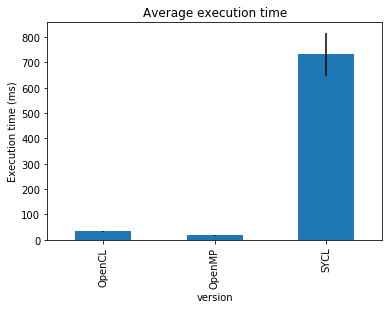

In [15]:
# Plot results
df = pd.read_csv(FILENAME)
by_version = df.groupby(by="version", sort=False)
avg_time = by_version.mean()
std = by_version.std()
plt = avg_time.plot(legend=False, kind="bar", yerr=std)
plt.set_title("Average execution time")
plt.set_ylabel("Execution time (ms)")
